Risk and Return Models

In this section, we compare how well the different risk models predict an out-of-sample covariance matrix, and how well the different returns models predict out-of-sample returns.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import risk_models, expected_returns, plotting

In [2]:
NIFTY50_TICKER=['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS','BPCL.NS','BRITANNIA.NS','CIPLA.NS','COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS','GAIL.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS']
df = yf.download(NIFTY50_TICKER, period="max")
df = df["Adj Close"]
df

[*********************100%***********************]  50 of 50 completed


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
1995-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53.472763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-06,740.799988,2549.050049,715.750000,3941.199951,11027.950195,5528.799805,558.750000,434.000000,3452.050049,884.299988,...,27736.199219,679.400024,301.250000,1100.900024,3111.449951,977.950012,1444.400024,6405.450195,633.000000,512.299988
2021-05-07,767.750000,2551.649902,716.750000,3866.750000,11318.450195,5493.799805,568.500000,443.149994,3461.250000,882.900024,...,27840.000000,679.450012,302.750000,1182.349976,3132.899902,980.950012,1446.500000,6481.899902,629.400024,515.250000
2021-05-10,765.450012,2556.949951,715.250000,3868.649902,11332.000000,5497.500000,572.549988,453.700012,3413.800049,900.250000,...,27309.949219,698.200012,314.850006,1216.349976,3145.500000,990.500000,1455.150024,6403.100098,674.599976,525.950012


/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  "Could not fix matrix. Please try a different risk model.", UserWarning


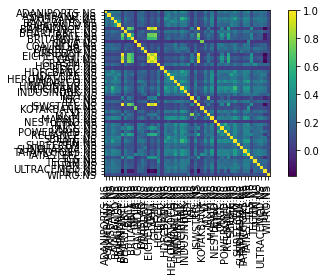

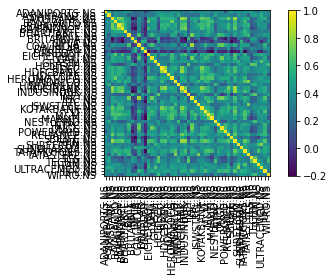

In [3]:
past_df, future_df = df.iloc[:-50], df.iloc[-50:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True, )
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

We can see that visually, the sample covariance does not capture some of the new features of the covariance matrix, for example the highly correlated group of FAANG stocks. We may be able to improve this by using an exponentially-weighted covariance matrix, which gives more weight to recent data. We can also look at how each model predicts future variance.



/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  "Could not fix matrix. Please try a different risk model.", UserWarning


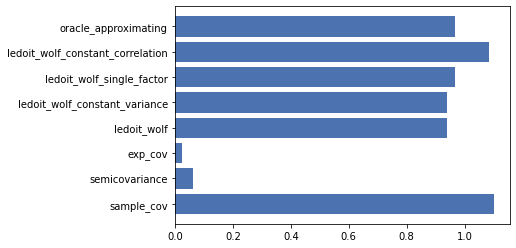

In [4]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(df, method=method)
    variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs(variance - future_variance)) / len(variance))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

We can see that the exponential covariance matrix is a much better estimator of future variance compared to the other models. Its mean absolute error is 2%, which is actually pretty good. Let's visually compare the exponential cov matrix to the realised future cov matrix:


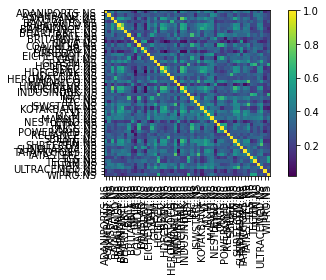

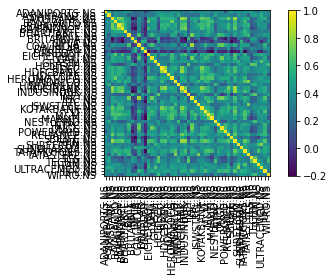

In [5]:
exp_cov = risk_models.exp_cov(past_df)
plotting.plot_covariance(exp_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

What about returns? Will the exponentially-weighted returns similarly be the best performer?



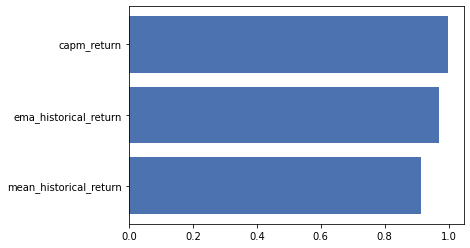

In [6]:
future_rets = expected_returns.mean_historical_return(future_df)
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return",
    ]

for method in return_methods:
    mu = expected_returns.return_model(past_df, method=method)
    mean_abs_errors.append(np.sum(np.abs(mu - future_rets)) / len(mu))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, return_methods)
plt.show()

In [7]:
print(mean_abs_errors)

[0.9150444150387355, 0.9714685180074754, 0.9974701218385823]


The exponential moving average is marginally better than the others, but the improvement is almost unnoticeable. We also note that the mean absolute deviations are above 25%, meaning that if your expected annual returns are 10%, on average the realised annual return could be anywhere from a 15% loss to a 35% gain. This is a massive range, and gives some context to the advice in the docs suggesting that you optimize without providing an estimate of returns.



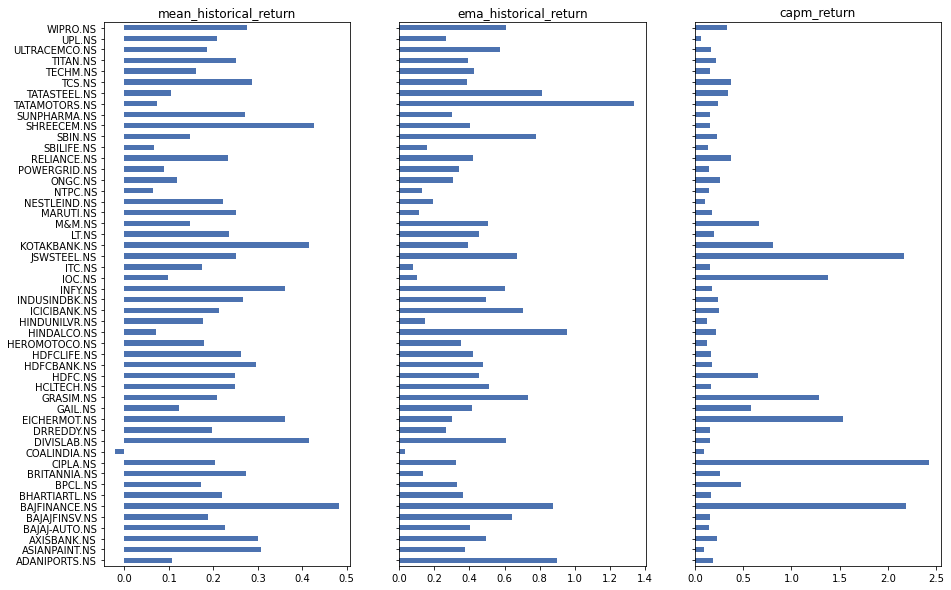

In [8]:

fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,10))

for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(past_df, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])

The good news is that we see a good degree of agreement (apart from the ema method).


Mean-variance optimization

In this cookbook recipe, we work on several examples demonstrating PyPortfolioOpt's mean-variance capabilities. I will discuss what I think should be your "default" options, based on my experience in optimising portfolios.

To start, you need a list of tickers. Some people just provide the whole universe of stocks, but I don't think this is a good idea - portfolio optimization is quite different from asset selection. I would suggest anywhere from 10-50 stocks as a starting point.

Some of the things we cover:

Downloading data and getting it into PyPortfolioOpt
Calculating and visualising the covariance matrix
Optimising a long/short portfolio to minimise total variance
Optimising a portfolio to maximise the Sharpe ratio, subject to sector constraints
Optimising a portfolio to maximise return for a given risk, subject to sector constraints, with an L2 regularisation objective
Optimising a market-neutral portfolio to minimise risk for a given level of return
Optimising along the mean-semivariance frontier
Optimising along the mean-CVaR frontier
Plotting the efficient frontier:
Simple (using CLA)
Constrained
Complex plots
Please consult the docs for more info.


In [9]:
prices = df

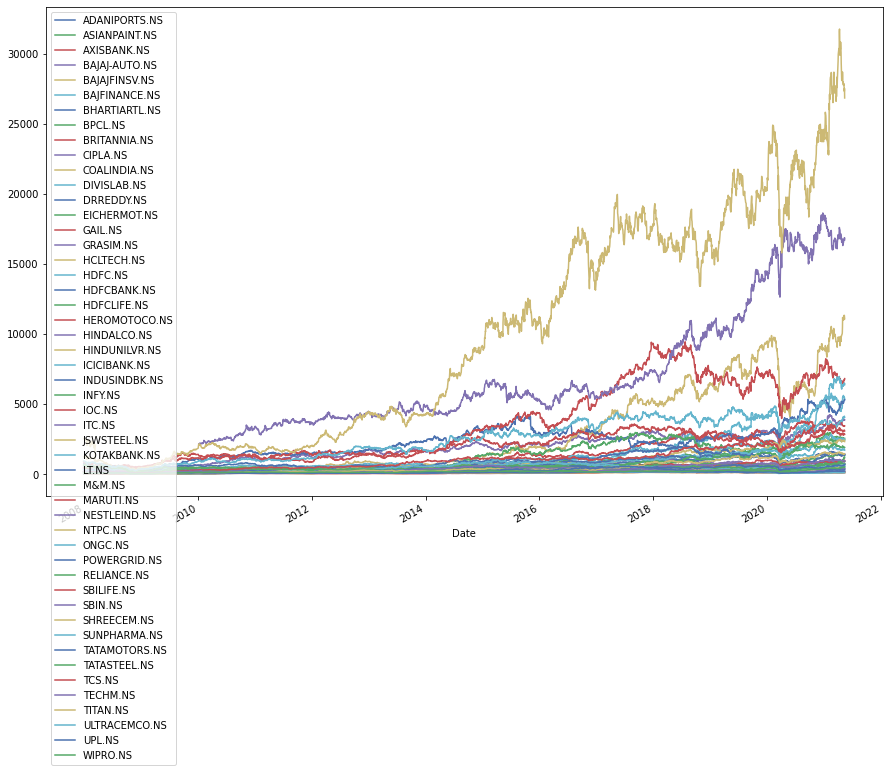

In [10]:

prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

In [11]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  "Could not fix matrix. Please try a different risk model.", UserWarning


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
ADANIPORTS.NS,0.184256,0.029636,0.070355,0.038382,0.052803,0.053958,0.036193,0.040295,0.024332,0.027716,...,0.037592,0.027383,0.064183,0.074969,0.028131,0.047287,0.045682,0.046342,0.053935,0.030635
ASIANPAINT.NS,0.029636,0.072554,0.027363,0.020791,0.022528,0.026697,0.018855,0.020553,0.015431,-0.001341,...,0.021229,0.014670,0.030431,0.032548,0.013930,0.020635,0.026153,0.025585,0.024519,0.017235
AXISBANK.NS,0.070355,0.027363,0.210919,0.043844,0.051002,0.059744,0.049177,0.051420,0.019993,0.011111,...,0.044245,0.035383,0.077064,0.078064,0.039030,0.052990,0.069843,0.048879,0.059539,0.053546
BAJAJ-AUTO.NS,0.038382,0.020791,0.043844,0.108041,0.061909,0.038180,0.031482,0.028302,0.015063,0.005148,...,0.029235,0.018274,0.050667,0.047525,0.025245,0.028514,0.039766,0.036643,0.037600,0.029660
BAJAJFINSV.NS,0.052803,0.022528,0.051002,0.061909,0.174710,0.063721,0.029620,0.033252,0.021298,0.004606,...,0.034149,0.016811,0.054769,0.056960,0.022604,0.037600,0.039958,0.039362,0.041778,0.029137
BAJFINANCE.NS,0.053958,0.026697,0.059744,0.038180,0.063721,5.642854,0.082056,1.098087,0.556060,0.018754,...,0.036139,0.020191,0.057970,0.058281,0.598627,0.032059,0.049853,0.038728,-0.207236,0.023233
BHARTIARTL.NS,0.036193,0.018855,0.049177,0.031482,0.029620,0.082056,0.147320,0.046876,0.019774,-0.056237,...,0.028211,0.027260,0.051231,0.053987,0.038135,0.028996,0.039019,0.036682,0.027518,0.036267
BPCL.NS,0.040295,0.020553,0.051420,0.028302,0.033252,1.098087,0.046876,0.379342,0.122961,-0.014173,...,0.032753,0.025569,0.052163,0.055016,0.143518,0.021565,0.041748,0.036379,-0.027930,0.023019
BRITANNIA.NS,0.024332,0.015431,0.019993,0.015063,0.021298,0.556060,0.019774,0.122961,0.141665,-0.001484,...,0.017814,0.020386,0.027977,0.031289,0.076946,0.018753,0.026641,0.018122,-0.017854,0.010381
CIPLA.NS,0.027716,-0.001341,0.011111,0.005148,0.004606,0.018754,-0.056237,-0.014173,-0.001484,23.049645,...,0.029123,0.041584,-0.012459,0.822204,0.009053,0.026740,0.010820,0.020073,-0.013837,0.046714


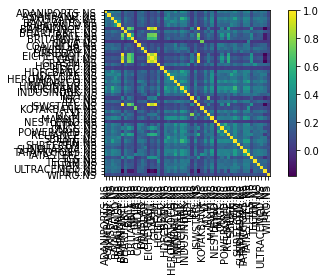

In [12]:

plotting.plot_covariance(sample_cov, plot_correlation=True);

For reasons discussed in the docs, the sample covariance matrix should not be your default choice. I think a better option is Ledoit-Wolf shrinkage, which reduces the extreme values in the covariance matrix. In the image below, we can see that there are fewer bright spots outside the diagonal:

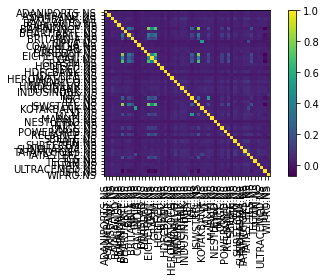

In [13]:

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

Return estimation
As discussed in the docs, it is often a bad idea to provide returns using a simple estimate like the mean of past returns. Unless you have a proprietary method for estimating returns, research suggests that you may be better off not providing expected returns – you can then just find the min_volatility() portfolio or use HRP.

However, in this example we will use the CAPM returns, which aims to be slightly more stable than the default mean historical return. Please see the notebook 1-RiskReturnModels.ipynb for more information.


In [14]:
mu = expected_returns.capm_return(prices)
mu

ADANIPORTS.NS    0.191668
ASIANPAINT.NS    0.099269
AXISBANK.NS      0.226099
BAJAJ-AUTO.NS    0.143288
BAJAJFINSV.NS    0.159986
BAJFINANCE.NS    2.163198
BHARTIARTL.NS    0.168014
BPCL.NS          0.479068
BRITANNIA.NS     0.260686
CIPLA.NS         2.411018
COALINDIA.NS     0.102137
DIVISLAB.NS      0.159052
DRREDDY.NS       0.161041
EICHERMOT.NS     1.526844
GAIL.NS          0.582048
GRASIM.NS        1.275170
HCLTECH.NS       0.165626
HDFC.NS          0.650808
HDFCBANK.NS      0.181916
HDFCLIFE.NS      0.165856
HEROMOTOCO.NS    0.130947
HINDALCO.NS      0.224011
HINDUNILVR.NS    0.129492
ICICIBANK.NS     0.248526
INDUSINDBK.NS    0.236573
INFY.NS          0.176301
IOC.NS           1.367929
ITC.NS           0.154763
JSWSTEEL.NS      2.148934
KOTAKBANK.NS     0.806776
LT.NS            0.195131
M&M.NS           0.663899
MARUTI.NS        0.180314
NESTLEIND.NS     0.105771
NTPC.NS          0.150248
ONGC.NS          0.265404
POWERGRID.NS     0.144694
RELIANCE.NS      0.375111
SBILIFE.NS  

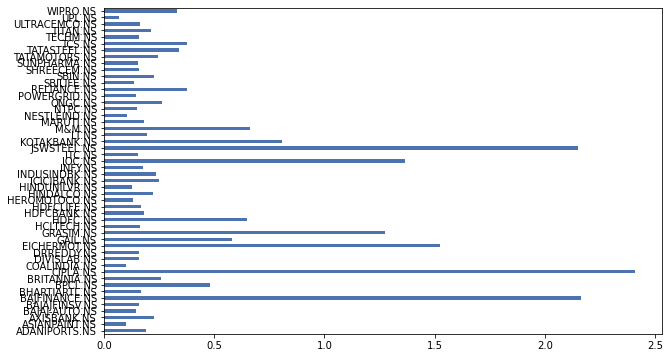

In [15]:
mu.plot.barh(figsize=(10,6));


Long/short min variance
In this section, we construct a long/short portfolio with the objective of minimising variance. There is a good deal of research that demonstrates that these global-minimum variance (GMV) portfolios outperform mean-variance optimized portfolios.


In [16]:
from efficient_frontier import EfficientFrontier

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.02934),
             ('ASIANPAINT.NS', 0.03802),
             ('AXISBANK.NS', 0.01176),
             ('BAJAJ-AUTO.NS', 0.02896),
             ('BAJAJFINSV.NS', 0.02567),
             ('BAJFINANCE.NS', -0.00146),
             ('BHARTIARTL.NS', 0.02706),
             ('BPCL.NS', 0.01566),
             ('BRITANNIA.NS', 0.0323),
             ('CIPLA.NS', 0.0005),
             ('COALINDIA.NS', 0.04575),
             ('DIVISLAB.NS', 0.0282),
             ('DRREDDY.NS', 0.02654),
             ('EICHERMOT.NS', -0.00267),
             ('GAIL.NS', 0.01351),
             ('GRASIM.NS', 0.00857),
             ('HCLTECH.NS', 0.02553),
             ('HDFC.NS', 0.00427),
             ('HDFCBANK.NS', 0.02029),
             ('HDFCLIFE.NS', 0.04972),
             ('HEROMOTOCO.NS', 0.03082),
             ('HINDALCO.NS', 0.00859),
             ('HINDUNILVR.NS', 0.03019),
             ('ICICIBANK.NS', 0.01427),
             ('INDUSINDBK.NS', 0.01179),
             ('INFY.NS'

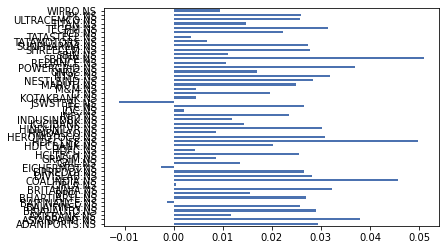

In [17]:
pd.Series(weights).plot.barh();

In [18]:
ef.portfolio_performance(verbose=True);

Annual volatility: 15.8%


In [19]:
prices


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
1995-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53.472763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-06,740.799988,2549.050049,715.750000,3941.199951,11027.950195,5528.799805,558.750000,434.000000,3452.050049,884.299988,...,27736.199219,679.400024,301.250000,1100.900024,3111.449951,977.950012,1444.400024,6405.450195,633.000000,512.299988
2021-05-07,767.750000,2551.649902,716.750000,3866.750000,11318.450195,5493.799805,568.500000,443.149994,3461.250000,882.900024,...,27840.000000,679.450012,302.750000,1182.349976,3132.899902,980.950012,1446.500000,6481.899902,629.400024,515.250000
2021-05-10,765.450012,2556.949951,715.250000,3868.649902,11332.000000,5497.500000,572.549988,453.700012,3413.800049,900.250000,...,27309.949219,698.200012,314.850006,1216.349976,3145.500000,990.500000,1455.150024,6403.100098,674.599976,525.950012


Let's say we were happy with this portfolio and wanted to actually go out and buy the shares. To do this, we would need to construct a discrete allocation (unless your broker supports fractional shares!)

If we had \$20,0000 to invest and would like our portfolio to be 130/30 long/short, we can construct the actual allocation as follows:


In [20]:
from discrete_allocation import DiscreteAllocation

latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $26.70 leftover


{'ADANIPORTS.NS': 1,
 'ASIANPAINT.NS': 1,
 'AXISBANK.NS': 1,
 'BHARTIARTL.NS': 1,
 'BPCL.NS': 1,
 'COALINDIA.NS': 6,
 'GAIL.NS': 2,
 'HCLTECH.NS': 1,
 'HDFCBANK.NS': 1,
 'HDFCLIFE.NS': 2,
 'HINDALCO.NS': 1,
 'ICICIBANK.NS': 1,
 'INDUSINDBK.NS': 1,
 'INFY.NS': 1,
 'ITC.NS': 3,
 'NTPC.NS': 6,
 'ONGC.NS': 3,
 'POWERGRID.NS': 3,
 'SBILIFE.NS': 1,
 'SBIN.NS': 1,
 'SUNPHARMA.NS': 1,
 'TATAMOTORS.NS': 1,
 'TECHM.NS': 1,
 'UPL.NS': 1,
 'WIPRO.NS': 1,
 'EICHERMOT.NS': -1,
 'JSWSTEEL.NS': -5}

Max Sharpe with sector constraints

If you have your own model for returns (or have read the warnings and want to proceed anyways), you may consider maximising the Sharpe ratio. This theoretically gives the optimal portfolio in terms of risks-returns.

In this section, we construct a long-only max-sharpe portfolio, but also incorporate sector constraints. Sector constraints require three things. A sector_mapper, your sector_lower bounds, and your sector_upper bounds.



In [27]:
sector_mapper ={}
for i in range(len(NIFTY50_TICKER)):
    sector_mapper[NIFTY50_TICKER[i]]=str(yf.Ticker(NIFTY50_TICKER[i]).info['sector'])
    print(sector_mapper)

{'ADANIPORTS.NS': 'Industrials'}
{'ADANIPORTS.NS': 'Industrials', 'ASIANPAINT.NS': 'Basic Materials'}
{'ADANIPORTS.NS': 'Industrials', 'ASIANPAINT.NS': 'Basic Materials', 'AXISBANK.NS': 'Financial Services'}
{'ADANIPORTS.NS': 'Industrials', 'ASIANPAINT.NS': 'Basic Materials', 'AXISBANK.NS': 'Financial Services', 'BAJAJ-AUTO.NS': 'Consumer Cyclical'}
{'ADANIPORTS.NS': 'Industrials', 'ASIANPAINT.NS': 'Basic Materials', 'AXISBANK.NS': 'Financial Services', 'BAJAJ-AUTO.NS': 'Consumer Cyclical', 'BAJFINANCE.NS': 'Financial Services'}
{'ADANIPORTS.NS': 'Industrials', 'ASIANPAINT.NS': 'Basic Materials', 'AXISBANK.NS': 'Financial Services', 'BAJAJ-AUTO.NS': 'Consumer Cyclical', 'BAJFINANCE.NS': 'Financial Services', 'BAJAJFINSV.NS': 'Financial Services'}
{'ADANIPORTS.NS': 'Industrials', 'ASIANPAINT.NS': 'Basic Materials', 'AXISBANK.NS': 'Financial Services', 'BAJAJ-AUTO.NS': 'Consumer Cyclical', 'BAJFINANCE.NS': 'Financial Services', 'BAJAJFINSV.NS': 'Financial Services', 'BHARTIARTL.NS': 'Com

In [28]:
sector_lower = {
    "Industrials": 0.1, # at least 10% to staples
    "Financial Services": 0.05 # at least 5% to tech
    # For all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Financial Services": 0.2,
    "Aerospace":0.1,
    "Consumer Cylical": 0.1,
    "Healthcare":0.15
}



We then set up the optimizer and add our constraints. We can use ef.add_objective() to add other constraints. For example, let's say that in addition to the above sector constraints, I specifically want:

10% of the portfolio in AMZN
Less than 5% of my portfolio in TSLA


In [29]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

axis_index = ef.tickers.index("AXISBANK.NS")
ef.add_constraint(lambda w: w[axis_index] == 0.05)

hero_index = ef.tickers.index("HEROMOTOCO.NS")
ef.add_constraint(lambda w: w[hero_index] <= 0.05)

#ef.add_constraint(lambda w: w[10] >= 0.05)

ef.max_sharpe()
weights = ef.clean_weights()

In [30]:
weights


OrderedDict([('ADANIPORTS.NS', 0.05611),
             ('ASIANPAINT.NS', 0.00901),
             ('AXISBANK.NS', 0.05),
             ('BAJAJ-AUTO.NS', 0.01524),
             ('BAJAJFINSV.NS', 0.0),
             ('BAJFINANCE.NS', 0.02742),
             ('BHARTIARTL.NS', 0.01592),
             ('BPCL.NS', 0.0),
             ('BRITANNIA.NS', 0.0),
             ('CIPLA.NS', 0.02196),
             ('COALINDIA.NS', 0.01839),
             ('DIVISLAB.NS', 0.01725),
             ('DRREDDY.NS', 0.02061),
             ('EICHERMOT.NS', 0.0),
             ('GAIL.NS', 0.0),
             ('GRASIM.NS', 0.03539),
             ('HCLTECH.NS', 0.01688),
             ('HDFC.NS', 0.02912),
             ('HDFCBANK.NS', 0.0),
             ('HDFCLIFE.NS', 0.02735),
             ('HEROMOTOCO.NS', 0.01351),
             ('HINDALCO.NS', 0.01353),
             ('HINDUNILVR.NS', 0.01278),
             ('ICICIBANK.NS', 0.00316),
             ('INDUSINDBK.NS', 0.0053),
             ('INFY.NS', 0.01846),
             ('

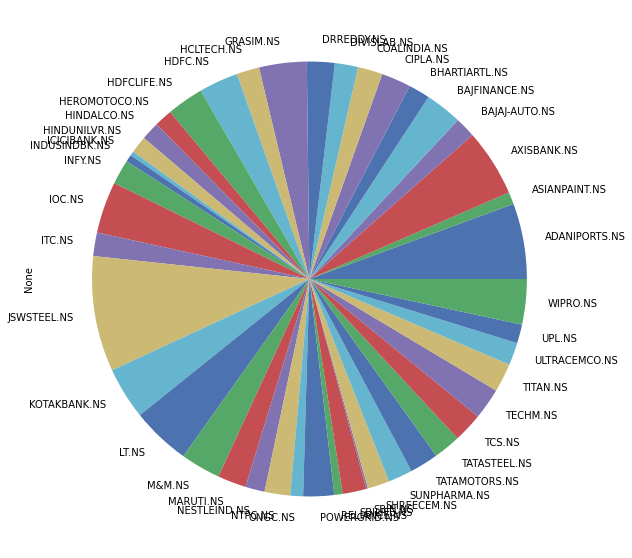

In [31]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [32]:
# O(N^2) loop not a good idea in a coding interview :)
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Energy: 0.072
Utilities: 0.042
Technology: 0.114
Healthcare: 0.078
Financial Services: 0.200
Communication Services: 0.016
Consumer Cyclical: 0.122
Consumer Defensive: 0.045
Industrials: 0.100
Basic Materials: 0.211


Maximise return for a given risk, with L2 regularisation

Let's imagine that we've put a lot of thought into our risk tolerance, and have decided that we can't accept anything more than 15% volatility. We can use PyPortfolioOpt to construct a portfolio that maximises return for a given risk (with the same caveats about expected returns).



In [33]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.18)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.05558),
             ('ASIANPAINT.NS', 0.02813),
             ('AXISBANK.NS', 0.01014),
             ('BAJAJ-AUTO.NS', 0.02379),
             ('BAJAJFINSV.NS', 0.01826),
             ('BAJFINANCE.NS', 0.00904),
             ('BHARTIARTL.NS', 0.02281),
             ('BPCL.NS', 0.00662),
             ('BRITANNIA.NS', 0.02017),
             ('CIPLA.NS', 0.00686),
             ('COALINDIA.NS', 0.0364),
             ('DIVISLAB.NS', 0.02388),
             ('DRREDDY.NS', 0.02422),
             ('EICHERMOT.NS', 0.0),
             ('GAIL.NS', 0.00372),
             ('GRASIM.NS', 0.01609),
             ('HCLTECH.NS', 0.022),
             ('HDFC.NS', 0.012),
             ('HDFCBANK.NS', 0.01497),
             ('HDFCLIFE.NS', 0.04435),
             ('HEROMOTOCO.NS', 0.02456),
             ('HINDALCO.NS', 0.00922),
             ('HINDUNILVR.NS', 0.02424),
             ('ICICIBANK.NS', 0.01228),
             ('INDUSINDBK.NS', 0.01111),
             ('INFY.NS', 0.0214

In [34]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

1/50 tickers have zero weight


In [35]:

ef.portfolio_performance(verbose=True)

Expected annual return: 30.3%
Annual volatility: 18.0%
Sharpe Ratio: 1.57


(0.3027863974847349, 0.1800000161766398, 1.5710354003925617)

While this portfolio seems like it meets our objectives, we might be worried by the fact that a lot of the tickers have been assigned zero weight. In effect, the optimizer is "overfitting" to the data you have provided -- you are much more likely to get better results by enforcing some level of diversification. One way of doing this is to use L2 regularisation – essentially, adding a penalty on the number of near-zero weights.



In [36]:
import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.18)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.05548),
             ('ASIANPAINT.NS', 0.02803),
             ('AXISBANK.NS', 0.01031),
             ('BAJAJ-AUTO.NS', 0.02376),
             ('BAJAJFINSV.NS', 0.01834),
             ('BAJFINANCE.NS', 0.00907),
             ('BHARTIARTL.NS', 0.02278),
             ('BPCL.NS', 0.00685),
             ('BRITANNIA.NS', 0.02021),
             ('CIPLA.NS', 0.00686),
             ('COALINDIA.NS', 0.03612),
             ('DIVISLAB.NS', 0.02385),
             ('DRREDDY.NS', 0.02417),
             ('EICHERMOT.NS', 0.0),
             ('GAIL.NS', 0.00401),
             ('GRASIM.NS', 0.01606),
             ('HCLTECH.NS', 0.022),
             ('HDFC.NS', 0.01202),
             ('HDFCBANK.NS', 0.01507),
             ('HDFCLIFE.NS', 0.04388),
             ('HEROMOTOCO.NS', 0.02451),
             ('HINDALCO.NS', 0.00941),
             ('HINDUNILVR.NS', 0.02419),
             ('ICICIBANK.NS', 0.01243),
             ('INDUSINDBK.NS', 0.01128),
             ('INFY.NS', 0.0

In [37]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

1/50 tickers have zero weight



We can tune the value of gamma to choose the number of nonzero tickers. Larger gamma pulls portfolio weights towards an equal allocation.


In [38]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1)  # gamme is the tuning parameter
ef.efficient_risk(0.18)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.05473),
             ('ASIANPAINT.NS', 0.02726),
             ('AXISBANK.NS', 0.01162),
             ('BAJAJ-AUTO.NS', 0.02347),
             ('BAJAJFINSV.NS', 0.01889),
             ('BAJFINANCE.NS', 0.00918),
             ('BHARTIARTL.NS', 0.02258),
             ('BPCL.NS', 0.00861),
             ('BRITANNIA.NS', 0.02048),
             ('CIPLA.NS', 0.00679),
             ('COALINDIA.NS', 0.03405),
             ('DIVISLAB.NS', 0.02355),
             ('DRREDDY.NS', 0.02378),
             ('EICHERMOT.NS', 0.0),
             ('GAIL.NS', 0.0062),
             ('GRASIM.NS', 0.01582),
             ('HCLTECH.NS', 0.02195),
             ('HDFC.NS', 0.01217),
             ('HDFCBANK.NS', 0.01586),
             ('HDFCLIFE.NS', 0.04048),
             ('HEROMOTOCO.NS', 0.02417),
             ('HINDALCO.NS', 0.01086),
             ('HINDUNILVR.NS', 0.02385),
             ('ICICIBANK.NS', 0.01354),
             ('INDUSINDBK.NS', 0.01255),
             ('INFY.NS', 0.

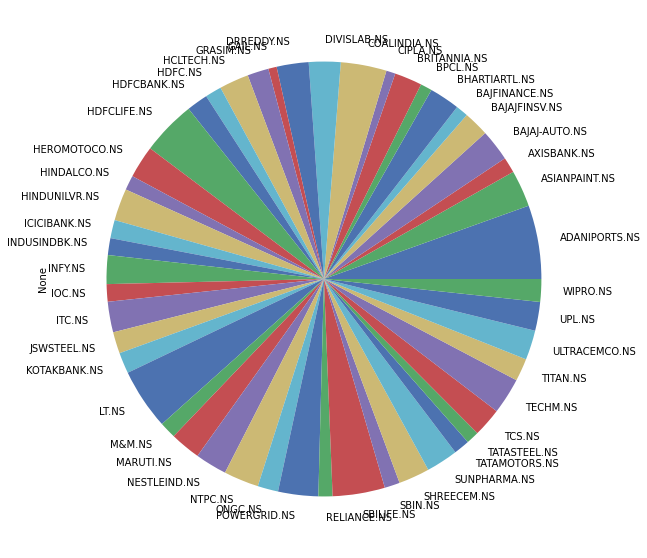

In [39]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [40]:

ef.portfolio_performance(verbose=True);

Expected annual return: 30.2%
Annual volatility: 18.0%
Sharpe Ratio: 1.57


Minimise risk for a given return, market-neutral
We may instead be in the situation where we have a certain required rate of return (maybe we are a pension fund that needs 7% return a year), but would like to minimise risk. Additionally, suppose we would like our portfolio to be market neutral, in the sense that it is equally exposed to the long and short sides.


In [41]:
# Must have no weight bounds to allow shorts
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights


OrderedDict([('ADANIPORTS.NS', -0.00079),
             ('ASIANPAINT.NS', -0.00288),
             ('AXISBANK.NS', 0.0),
             ('BAJAJ-AUTO.NS', -0.00186),
             ('BAJAJFINSV.NS', -0.00155),
             ('BAJFINANCE.NS', 0.00949),
             ('BHARTIARTL.NS', -0.00156),
             ('BPCL.NS', -0.00141),
             ('BRITANNIA.NS', -0.00274),
             ('CIPLA.NS', 0.00444),
             ('COALINDIA.NS', -0.0028),
             ('DIVISLAB.NS', -0.0016),
             ('DRREDDY.NS', -0.00134),
             ('EICHERMOT.NS', -0.00186),
             ('GAIL.NS', -0.00104),
             ('GRASIM.NS', 0.00489),
             ('HCLTECH.NS', -0.00139),
             ('HDFC.NS', 0.0039),
             ('HDFCBANK.NS', -0.00104),
             ('HDFCLIFE.NS', -0.00124),
             ('HEROMOTOCO.NS', -0.00208),
             ('HINDALCO.NS', -0.00026),
             ('HINDUNILVR.NS', -0.00212),
             ('ICICIBANK.NS', 0.0),
             ('INDUSINDBK.NS', 0.00014),
             ('

In [42]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 4.4%
Sharpe Ratio: 1.13


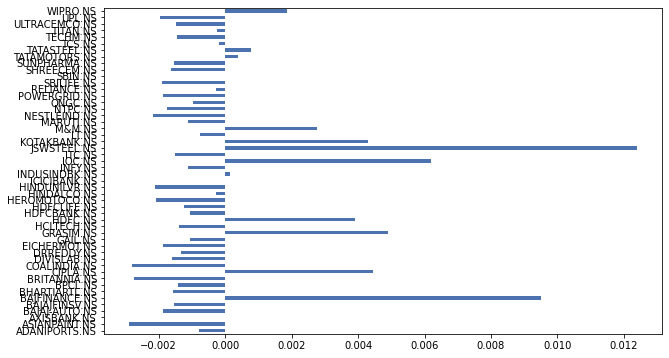

In [43]:
pd.Series(weights).plot.barh(figsize=(10,6));

In [44]:
print(f"Net weight: {sum(weights.values()):.2f}")



Net weight: 0.00


Efficient semi-variance optimization
In this example, we will minimise the portfolio semivariance (i.e downside volatility) subject to a return constraint (target 20%).

There are actually two ways of doing this in PyPortfolioOpt. The first is the "intuitive" way. We compute a semicovariance matrix, and pass this into EfficientFrontier (just like we would do for the exponential cov matrix or the Ledoit-Wolf shrunk matrix).


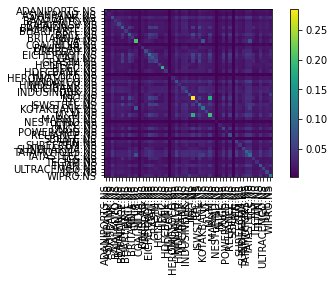

In [45]:
semicov = risk_models.semicovariance(prices, benchmark=0)
plotting.plot_covariance(semicov);

In [46]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.2)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.0),
             ('ASIANPAINT.NS', 0.00666),
             ('AXISBANK.NS', 0.0),
             ('BAJAJ-AUTO.NS', 0.0),
             ('BAJAJFINSV.NS', 0.0),
             ('BAJFINANCE.NS', 0.0),
             ('BHARTIARTL.NS', 0.0),
             ('BPCL.NS', 0.0),
             ('BRITANNIA.NS', 0.00507),
             ('CIPLA.NS', 0.02197),
             ('COALINDIA.NS', 0.06712),
             ('DIVISLAB.NS', 0.0),
             ('DRREDDY.NS', 0.00428),
             ('EICHERMOT.NS', 0.0),
             ('GAIL.NS', 0.0),
             ('GRASIM.NS', 0.00595),
             ('HCLTECH.NS', 0.0),
             ('HDFC.NS', 0.0),
             ('HDFCBANK.NS', 0.0),
             ('HDFCLIFE.NS', 0.28317),
             ('HEROMOTOCO.NS', 0.0),
             ('HINDALCO.NS', 0.0),
             ('HINDUNILVR.NS', 0.01086),
             ('ICICIBANK.NS', 0.0),
             ('INDUSINDBK.NS', 0.0),
             ('INFY.NS', 0.0),
             ('IOC.NS', 0.00154),
             ('ITC.NS', 0

In [47]:
ef.portfolio_performance(verbose=True);

Expected annual return: 20.0%
Annual volatility: 6.9%
Sharpe Ratio: 2.62


However, this solution is not truly optimal in mean-semivariance space. To do the optimization properly, we must use the EfficientSemivariance class. This requires us to first compute the returns and drop NaNs.

In [48]:
returns = expected_returns.returns_from_prices(prices)
returns = returns.dropna()

In [49]:
from efficient_semivariance import EfficientSemivariance

es = EfficientSemivariance(mu, returns)
es.efficient_return(0.2)
es.portfolio_performance(verbose=True);

Expected annual return: 43.3%
Annual semi-deviation: 10.7%
Sortino Ratio: 3.84


To compare this with the heuristic solution, I will use a quick hack: replacing the es.weights with es.weights and running es.portfolio_performance again. Please don't be encouraged to do this in real life!


In [50]:

es.weights = ef.weights
es.portfolio_performance(verbose=True);

Expected annual return: 20.0%
Annual semi-deviation: 15.3%
Sortino Ratio: 1.18


We see that the heuristic method has a significantly lower Sortino ratio, and much higher semivariance.



Efficient CVaR optimization

In this example, we will find the portfolio that maximises return subject to a CVaR constraint.

Before doing this, let's first compute the 95%-CVaR for the max-sharpe portfolio.


In [51]:
returns = expected_returns.returns_from_prices(prices).dropna()
returns.head()

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-20,-0.005861,-0.004226,0.005070,0.010961,0.008538,0.010015,-0.001722,0.000893,0.002768,-0.007066,...,-0.042455,0.000097,0.002845,0.001355,-0.001422,-0.015994,-0.002989,-0.020096,0.006490,-0.002710
2017-11-21,0.005519,-0.005187,0.003027,0.017967,0.006311,0.002493,0.021516,0.013976,0.011274,0.019611,...,-0.028538,0.040414,0.002955,0.013103,-0.011282,0.035759,0.040181,-0.004281,0.035121,-0.001189
2017-11-22,0.034182,0.012066,-0.011522,0.003924,-0.005733,-0.019782,-0.008246,-0.007429,-0.008667,0.005113,...,0.005619,-0.005204,0.010253,-0.000422,0.002881,-0.022780,-0.002820,0.016093,-0.009808,0.001020
2017-11-23,-0.017853,-0.012518,0.006753,-0.014653,-0.008259,-0.005806,-0.005510,-0.005023,0.001508,-0.002665,...,0.006536,0.017749,-0.005483,0.002320,0.000224,0.014505,-0.008916,-0.010697,0.002811,-0.002548
2017-11-24,-0.006141,0.000000,0.002481,0.007244,0.005259,0.014941,0.000907,0.011581,-0.008437,-0.003076,...,-0.006984,0.008720,-0.001760,-0.005963,0.002536,0.009191,0.029036,0.013417,-0.006874,-0.002896


In [52]:

ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 57.8%
Annual volatility: 30.1%
Sharpe Ratio: 1.86


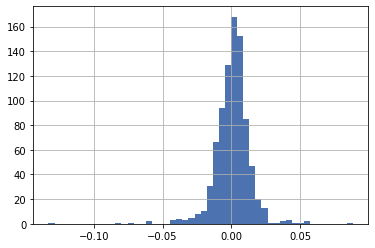

In [53]:
# Compute CVaR
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);

In [54]:
# VaR
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))



VaR: -1.75%
CVaR: -3.29%


This value of the CVaR means that our average loss on the worst 5% of days will be -3.35%. Let's say that this were beyond our comfort zone (for a \$100,000 portfolio, this would mean losing \\$3350 in a day).

Let's firstly construct the portfolio with the minimum CVaR:


In [55]:

from efficient_cvar import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

Expected annual return: 48.6%
Conditional Value at Risk: 2.17%


We have significantly reduced the CVaR, but at the cost of a large reduction in returns. We can use efficient_risk to maximise the return for a target risk. Let's say that a 2.5% CVaR is acceptable.


In [56]:
ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.025)
ec.portfolio_performance(verbose=True);

Expected annual return: 139.2%
Conditional Value at Risk: 2.50%


We now have similar returns to before (24.7% vs 25.8%), but with a lower tail risk (2.50% CVaR vs 3.35%).

Plotting - Unconstrained
To plot the unconstrained efficient frontier, it is easiest to use the critical line algorithm.


In [57]:
from cla import CLA

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 53.4%
Annual volatility: 27.7%
Sharpe Ratio: 1.85


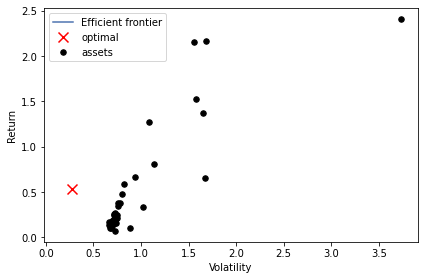

In [58]:
ax = plotting.plot_efficient_frontier(cla, showfig=True)

Plotting - Constrained
In this example, we will plot the efficient frontier corresponding to portfolios with a constraint on exposure to MSFT, AMZN, and TSLA (e.g maybe we want to avoid big tech).



In [63]:
import cvxpy as cp

mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S,)
big_tech_indices = [t in {"AXISBANK.NS", "TITAN.NS", "BRITANNIA.NS"} for t in NIFTY50_TICKER]
ef.add_constraint(lambda w: cp.sum(w[big_tech_indices]) <= 0.2)

As per the docs, before we call any optimization function, we should pass this to the plotting module:



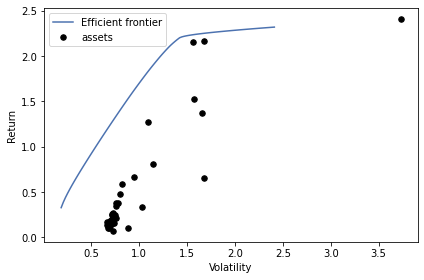

In [66]:
ax = plotting.plot_efficient_frontier(ef, ef_param="risk",
                                      #ef_param_range=np.linspace(0.15, 0.4, 50),
                                      showfig=False);

Complex plots

The plotting module allows you to pass in an ax, on top of which the plots are added. This allows you to build complex plots.

In this example, we will plot the efficient frontier as well as 10,000 simulated portfolios.

To generate the simulated portfolios, we will sample random weights from the Dirichlet distribution (these are already normalised):


In [67]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.42951985 0.36136604 0.51844559 ... 0.53439802 0.58435793 0.38328038]
Sample portfolio volatilities: 0       0.254587
1       0.221679
2       0.332472
3       0.342444
4       0.217948
          ...   
9995    0.323803
9996    0.251507
9997    0.302361
9998    0.454154
9999    0.236718
Length: 10000, dtype: float64


In [68]:
# mus = []
# stds = []
# sharpes = []
# for _ in range(10000):
#     w = np.random.dirichlet(np.ones(len(mu)))
#     # w = np.random.rand(len(mu))
#     # w /= w.sum()
#     ret = mu.dot(w)
#     std = np.sqrt(w.dot(S @ w))
#     mus.append(ret)
#     stds.append(std)
#     sharpes.append(ret / std)

/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/venv/lib/python3.7/site-packages/cvxpy-1.1.12-py3.7-linux-x86_64.egg/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.

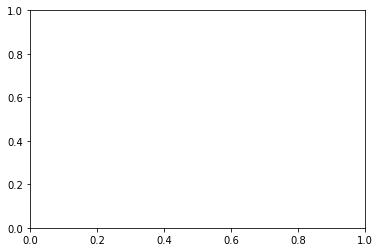

In [69]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

Advanced MVO - custom objectives¶

PyPortfolioOpt has implemented some of the most common objective functions (e.g min_volatility, max_sharpe, max_quadratic_utility, efficient_risk, efficient_return). However, sometimes yoy may have an idea for a different objective function.

In this cookbook recipe, we cover:

Mininimising transaction costs
Custom convex objectives
Custom nonconvex objectives


Acquiring data

As discussed in the previous notebook, assets are an exogenous input (i.e you must come up with a list of tickers). We will use yfinance to download data for thesee tickers


In [70]:
mu = expected_returns.capm_return(prices)
S = risk_models.semicovariance(prices)

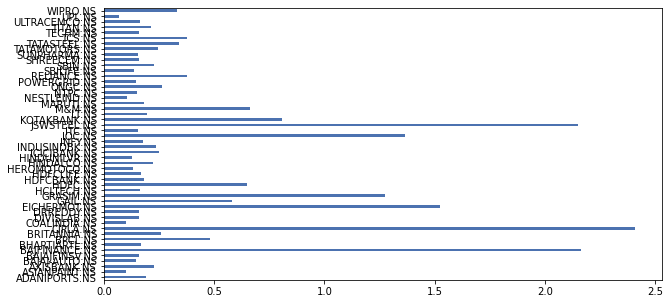

In [71]:
mu.plot.barh(figsize=(10,5));

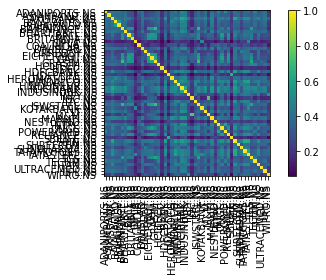

In [72]:
plotting.plot_covariance(S, plot_correlation=True);

Min volatility with a transaction cost objective
Let's say that you already have a portfolio, and want to now optimize it. It could be quite expensive to completely reallocate, so you may want to take into account transaction costs. PyPortfolioOpt provides a simple objective to account for this.

Note: this objective will not play nicely with max_sharpe.


In [73]:
# Pretend that you started with a default-weight allocation
initial_weights = np.array([1/len(NIFTY50_TICKER)] * len(NIFTY50_TICKER))

In [74]:
ef = EfficientFrontier(mu, S)

# 1% broker commission
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.01)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.02),
             ('ASIANPAINT.NS', 0.02),
             ('AXISBANK.NS', 0.0),
             ('BAJAJ-AUTO.NS', 0.02),
             ('BAJAJFINSV.NS', 0.01991),
             ('BAJFINANCE.NS', 0.0),
             ('BHARTIARTL.NS', 0.02),
             ('BPCL.NS', 0.0),
             ('BRITANNIA.NS', 0.02),
             ('CIPLA.NS', 0.01881),
             ('COALINDIA.NS', 0.02),
             ('DIVISLAB.NS', 0.02),
             ('DRREDDY.NS', 0.02),
             ('EICHERMOT.NS', 0.0),
             ('GAIL.NS', 0.00697),
             ('GRASIM.NS', 0.02),
             ('HCLTECH.NS', 0.02),
             ('HDFC.NS', 0.01719),
             ('HDFCBANK.NS', 0.02),
             ('HDFCLIFE.NS', 0.14603),
             ('HEROMOTOCO.NS', 0.02),
             ('HINDALCO.NS', 0.0),
             ('HINDUNILVR.NS', 0.02),
             ('ICICIBANK.NS', 0.0),
             ('INDUSINDBK.NS', 0.0),
             ('INFY.NS', 0.02),
             ('IOC.NS', 0.00063),
             ('ITC.NS',

Notice that many of the weights are 0.06667, i.e your original equal weight. In fact, the only change has been an allocation of AMD's weight to JD. If we lower the cost k, the allocation will change more:



In [75]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.0),
             ('ASIANPAINT.NS', 0.02),
             ('AXISBANK.NS', 0.0),
             ('BAJAJ-AUTO.NS', 0.00647),
             ('BAJAJFINSV.NS', 0.0),
             ('BAJFINANCE.NS', 0.0),
             ('BHARTIARTL.NS', 0.0),
             ('BPCL.NS', 0.0),
             ('BRITANNIA.NS', 0.02),
             ('CIPLA.NS', 0.00256),
             ('COALINDIA.NS', 0.06239),
             ('DIVISLAB.NS', 0.01157),
             ('DRREDDY.NS', 0.0156),
             ('EICHERMOT.NS', 0.0),
             ('GAIL.NS', 0.0),
             ('GRASIM.NS', 0.0),
             ('HCLTECH.NS', 0.0),
             ('HDFC.NS', 0.0),
             ('HDFCBANK.NS', 0.0),
             ('HDFCLIFE.NS', 0.25899),
             ('HEROMOTOCO.NS', 0.0),
             ('HINDALCO.NS', 0.0),
             ('HINDUNILVR.NS', 0.02),
             ('ICICIBANK.NS', 0.0),
             ('INDUSINDBK.NS', 0.0),
             ('INFY.NS', 0.0),
             ('IOC.NS', 0.0),
             ('ITC.NS', 0.0),
     

The optimizer seems to really like JD. The reason for this is that it is highly anticorrelated to other assets (notice the dark column in the covariance plot). Hence, historically, it adds a lot of diversification. But it is dangerous to place too much emphasis on what happened in the past, so we may want to limit the asset weights.

In addition, we notice that 4 stocks have now been allocated zero weight, which may be undesirable. Both of these problems can be fixed by adding an L2 regularisation objective.

In [76]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.add_objective(objective_functions.L2_reg)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.023),
             ('ASIANPAINT.NS', 0.02762),
             ('AXISBANK.NS', 0.01422),
             ('BAJAJ-AUTO.NS', 0.02336),
             ('BAJAJFINSV.NS', 0.02),
             ('BAJFINANCE.NS', 0.01573),
             ('BHARTIARTL.NS', 0.02165),
             ('BPCL.NS', 0.01428),
             ('BRITANNIA.NS', 0.02346),
             ('CIPLA.NS', 0.01843),
             ('COALINDIA.NS', 0.03231),
             ('DIVISLAB.NS', 0.02239),
             ('DRREDDY.NS', 0.0216),
             ('EICHERMOT.NS', 0.01221),
             ('GAIL.NS', 0.01599),
             ('GRASIM.NS', 0.01886),
             ('HCLTECH.NS', 0.02135),
             ('HDFC.NS', 0.02),
             ('HDFCBANK.NS', 0.02),
             ('HDFCLIFE.NS', 0.0356),
             ('HEROMOTOCO.NS', 0.02439),
             ('HINDALCO.NS', 0.01257),
             ('HINDUNILVR.NS', 0.02347),
             ('ICICIBANK.NS', 0.01741),
             ('INDUSINDBK.NS', 0.01444),
             ('INFY.NS', 0.02),
   

This has had too much of an evening-out effect. After all, if the resulting allocation is going to be so close to equal weights, we may as well stick with our initial allocation. We can reduce the strength of the L2 regularisation by reducing gamma:



In [77]:
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.add_objective(objective_functions.L2_reg, gamma=0.05)  # default is 1
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.02251),
             ('ASIANPAINT.NS', 0.02694),
             ('AXISBANK.NS', 0.01492),
             ('BAJAJ-AUTO.NS', 0.02284),
             ('BAJAJFINSV.NS', 0.02),
             ('BAJFINANCE.NS', 0.01634),
             ('BHARTIARTL.NS', 0.02119),
             ('BPCL.NS', 0.0149),
             ('BRITANNIA.NS', 0.02286),
             ('CIPLA.NS', 0.01889),
             ('COALINDIA.NS', 0.03144),
             ('DIVISLAB.NS', 0.02191),
             ('DRREDDY.NS', 0.02112),
             ('EICHERMOT.NS', 0.01287),
             ('GAIL.NS', 0.01655),
             ('GRASIM.NS', 0.01936),
             ('HCLTECH.NS', 0.02091),
             ('HDFC.NS', 0.02),
             ('HDFCBANK.NS', 0.02),
             ('HDFCLIFE.NS', 0.0346),
             ('HEROMOTOCO.NS', 0.02383),
             ('HINDALCO.NS', 0.01333),
             ('HINDUNILVR.NS', 0.02291),
             ('ICICIBANK.NS', 0.01803),
             ('INDUSINDBK.NS', 0.01518),
             ('INFY.NS', 0.02),
 

In [78]:
ef.portfolio_performance(verbose=True);



Expected annual return: 36.8%
Annual volatility: 13.6%
Sharpe Ratio: 2.56


/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


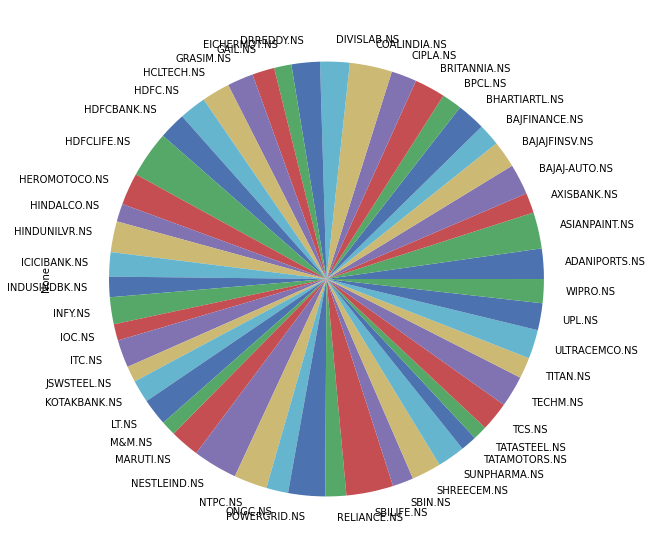

In [79]:
pd.Series(weights).plot.pie(figsize=(10,10));


Custom convex objectives

PyPortfolioOpt comes with the following built-in objective functions, as of v1.2.1:

Portfolio variance (i.e square of volatility)

Portfolio return

Sharpe ratio

L2 regularisation (minimising this reduces nonzero weights)

Quadratic utility

Transaction cost model (a simple one)

However, you may want have a different objective. If this new objective is convex, you can optimize a portfolio with the full benefit of PyPortfolioOpt's modular syntax, for example adding other constraints and objectives.

To demonstrate this, we will minimise the logarithmic-barrier function suggested in the paper 60 Years of Portfolio Optimization, by Kolm et al (2014):

$$f(w, S, k) = w^T S w - k \sum_{i=1}^N \ln w$$

We must first convert this mathematical objective into the language of cvxpy. Cvxpy is a powerful modelling language for convex optimization problems. It is clean and easy to use, the only caveat is that objectives must be expressed with cvxpy functions, a list of which can be found here.


In [80]:
import cvxpy as cp

# Note: functions are minimised. If you want to maximise an objective, stick a minus sign in it.
def logarithmic_barrier_objective(w, cov_matrix, k=0.1):
    log_sum = cp.sum(cp.log(w))
    var = cp.quad_form(w, cov_matrix)
    return var - k * log_sum


Once we have written the objective function, we can just use the ef.convex_objective() to minimise the objective.


In [81]:

ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.2))
ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.02119),
             ('ASIANPAINT.NS', 0.02628),
             ('AXISBANK.NS', 0.01497),
             ('BAJAJ-AUTO.NS', 0.02157),
             ('BAJAJFINSV.NS', 0.01837),
             ('BAJFINANCE.NS', 0.01563),
             ('BHARTIARTL.NS', 0.02007),
             ('BPCL.NS', 0.01491),
             ('BRITANNIA.NS', 0.02148),
             ('CIPLA.NS', 0.01718),
             ('COALINDIA.NS', 0.03451),
             ('DIVISLAB.NS', 0.02072),
             ('DRREDDY.NS', 0.02001),
             ('EICHERMOT.NS', 0.01401),
             ('GAIL.NS', 0.01574),
             ('GRASIM.NS', 0.01734),
             ('HCLTECH.NS', 0.01988),
             ('HDFC.NS', 0.0185),
             ('HDFCBANK.NS', 0.01862),
             ('HDFCLIFE.NS', 0.04447),
             ('HEROMOTOCO.NS', 0.02252),
             ('HINDALCO.NS', 0.01424),
             ('HINDUNILVR.NS', 0.0216),
             ('ICICIBANK.NS', 0.0166),
             ('INDUSINDBK.NS', 0.0151),
             ('INFY.NS', 0

In [82]:
ef.portfolio_performance(verbose=True);

Expected annual return: 36.6%
Annual volatility: 13.4%
Sharpe Ratio: 2.59


In [87]:

ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.2))
jd_index = ef.tickers.index('TATAMOTORS.NS')  # get the index of JD
ef.add_constraint(lambda w: w[jd_index] <= 0.15)
ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.02119),
             ('ASIANPAINT.NS', 0.02628),
             ('AXISBANK.NS', 0.01497),
             ('BAJAJ-AUTO.NS', 0.02157),
             ('BAJAJFINSV.NS', 0.01837),
             ('BAJFINANCE.NS', 0.01563),
             ('BHARTIARTL.NS', 0.02007),
             ('BPCL.NS', 0.01491),
             ('BRITANNIA.NS', 0.02148),
             ('CIPLA.NS', 0.01718),
             ('COALINDIA.NS', 0.03451),
             ('DIVISLAB.NS', 0.02072),
             ('DRREDDY.NS', 0.02001),
             ('EICHERMOT.NS', 0.01401),
             ('GAIL.NS', 0.01574),
             ('GRASIM.NS', 0.01734),
             ('HCLTECH.NS', 0.01988),
             ('HDFC.NS', 0.0185),
             ('HDFCBANK.NS', 0.01862),
             ('HDFCLIFE.NS', 0.04447),
             ('HEROMOTOCO.NS', 0.02252),
             ('HINDALCO.NS', 0.01424),
             ('HINDUNILVR.NS', 0.0216),
             ('ICICIBANK.NS', 0.0166),
             ('INDUSINDBK.NS', 0.0151),
             ('INFY.NS', 0

Custom nonconvex objectives
In some cases, you may be trying to optimize for nonconvex objectives. Optimization in general is a very hard problem, so please be aware that you may have mixed results in that case. Convex problems, on the other hand, are well understood and can be solved with nice theoretical guarantees.

PyPortfolioOpt does offer some functionality for nonconvex optimization, but it is not really encouraged. In particular, nonconvex optimization is not compatible with PyPortfolioOpt's modular constraints API.

As an example, we will use the Deviation Risk Parity objective from Kolm et al (2014). Because we are not using a convex solver, we don't have to define it using cvxpy functions.


In [88]:

def deviation_risk_parity(w, cov_matrix):
    diff = w * np.dot(cov_matrix, w) - (w * np.dot(cov_matrix, w)).reshape(-1, 1)
    return (diff ** 2).sum().sum()

In [89]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.12))
ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.02053),
             ('ASIANPAINT.NS', 0.03475),
             ('AXISBANK.NS', 0.01323),
             ('BAJAJ-AUTO.NS', 0.02154),
             ('BAJAJFINSV.NS', 0.01628),
             ('BAJFINANCE.NS', 0.01393),
             ('BHARTIARTL.NS', 0.01855),
             ('BPCL.NS', 0.01284),
             ('BRITANNIA.NS', 0.02217),
             ('CIPLA.NS', 0.01589),
             ('COALINDIA.NS', 0.05087),
             ('DIVISLAB.NS', 0.01961),
             ('DRREDDY.NS', 0.01877),
             ('EICHERMOT.NS', 0.01125),
             ('GAIL.NS', 0.01401),
             ('GRASIM.NS', 0.01545),
             ('HCLTECH.NS', 0.01816),
             ('HDFC.NS', 0.01711),
             ('HDFCBANK.NS', 0.01691),
             ('HDFCLIFE.NS', 0.05193),
             ('HEROMOTOCO.NS', 0.024),
             ('HINDALCO.NS', 0.01186),
             ('HINDUNILVR.NS', 0.02199),
             ('ICICIBANK.NS', 0.0149),
             ('INDUSINDBK.NS', 0.01345),
             ('INFY.NS', 


However, let's say we now want to enforce that JD has a weight of 10%. In the convex case, this would be as simple as:

ef.add_objective(lambda w: w[jd_index] == 0.10)
But unfortunately, scipy does not allow for such intuitive syntax. You will need to rearrange your constraints to make them either =0 or <= 0.

constraints = [
    # First constraint
     {"type": "eq",  # equality constraint,
      "fun": lambda w: w[1] - 0.2},  # the equality functions are assumed to = 0

    # Second constraint
    {"type": "ineq",  # inequality constraint
     "fun": lambda w: w[0] - 0.5}   # inequality functions <= 0
]
For more information, you can consult the scipy docs, but they aren't very helpful.


In [90]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.12))

ef.nonconvex_objective(
    deviation_risk_parity,
    objective_args=S,
    weights_sum_to_one=True,
    constraints=[
        {"type": "eq", "fun": lambda w: w[jd_index] - 0.10},
    ],
)

weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.01),
             ('ASIANPAINT.NS', 0.02871),
             ('AXISBANK.NS', 0.01),
             ('BAJAJ-AUTO.NS', 0.01139),
             ('BAJAJFINSV.NS', 0.01),
             ('BAJFINANCE.NS', 0.01),
             ('BHARTIARTL.NS', 0.01),
             ('BPCL.NS', 0.01),
             ('BRITANNIA.NS', 0.01052),
             ('CIPLA.NS', 0.01),
             ('COALINDIA.NS', 0.06941),
             ('DIVISLAB.NS', 0.01011),
             ('DRREDDY.NS', 0.01),
             ('EICHERMOT.NS', 0.01),
             ('GAIL.NS', 0.01),
             ('GRASIM.NS', 0.01),
             ('HCLTECH.NS', 0.01),
             ('HDFC.NS', 0.01),
             ('HDFCBANK.NS', 0.01),
             ('HDFCLIFE.NS', 0.11814),
             ('HEROMOTOCO.NS', 0.01),
             ('HINDALCO.NS', 0.01),
             ('HINDUNILVR.NS', 0.01),
             ('ICICIBANK.NS', 0.01),
             ('INDUSINDBK.NS', 0.01),
             ('INFY.NS', 0.01),
             ('IOC.NS', 0.01),
             ('I

More examples of nonconvex objectives¶
The scipy format is not intuitive and is hard to explain, so here are a bunch of examples (adapted from the tests). Some of these are actually convex, so you should use convex_objective instead.

In [91]:
# Another example of deviation risk parity
def deviation_risk_parity(w, cov_matrix):
    n = cov_matrix.shape[0]
    rp = (w * (cov_matrix @ w)) / cp.quad_form(w, cov_matrix)
    return cp.sum_squares(rp - 1 / n).value

ef = EfficientFrontier(mu, S)
ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.01969),
             ('ASIANPAINT.NS', 0.02735),
             ('AXISBANK.NS', 0.0125),
             ('BAJAJ-AUTO.NS', 0.02038),
             ('BAJAJFINSV.NS', 0.01626),
             ('BAJFINANCE.NS', 0.01328),
             ('BHARTIARTL.NS', 0.01827),
             ('BPCL.NS', 0.01255),
             ('BRITANNIA.NS', 0.02048),
             ('CIPLA.NS', 0.01525),
             ('COALINDIA.NS', 0.04163),
             ('DIVISLAB.NS', 0.01925),
             ('DRREDDY.NS', 0.01843),
             ('EICHERMOT.NS', 0.01166),
             ('GAIL.NS', 0.01352),
             ('GRASIM.NS', 0.01524),
             ('HCLTECH.NS', 0.01807),
             ('HDFC.NS', 0.01644),
             ('HDFCBANK.NS', 0.01673),
             ('HDFCLIFE.NS', 0.07286),
             ('HEROMOTOCO.NS', 0.02151),
             ('HINDALCO.NS', 0.01185),
             ('HINDUNILVR.NS', 0.02058),
             ('ICICIBANK.NS', 0.01419),
             ('INDUSINDBK.NS', 0.01259),
             ('INFY.NS'

In [92]:
# Deviation risk parity with weight bound on the first asset
ef = EfficientFrontier(mu, S)
ef.nonconvex_objective(deviation_risk_parity,
                       ef.cov_matrix,
                       constraints=[{"type":"eq", "fun":lambda w: w[0] - 0.1}])
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.1),
             ('ASIANPAINT.NS', 0.02518),
             ('AXISBANK.NS', 0.01649),
             ('BAJAJ-AUTO.NS', 0.02243),
             ('BAJAJFINSV.NS', 0.01918),
             ('BAJFINANCE.NS', 0.01746),
             ('BHARTIARTL.NS', 0.02172),
             ('BPCL.NS', 0.01731),
             ('BRITANNIA.NS', 0.02413),
             ('CIPLA.NS', 0.02028),
             ('COALINDIA.NS', 0.01278),
             ('DIVISLAB.NS', 0.02168),
             ('DRREDDY.NS', 0.02292),
             ('EICHERMOT.NS', 0.01641),
             ('GAIL.NS', 0.01841),
             ('GRASIM.NS', 0.01958),
             ('HCLTECH.NS', 0.02142),
             ('HDFC.NS', 0.02061),
             ('HDFCBANK.NS', 0.02099),
             ('HDFCLIFE.NS', 0.0),
             ('HEROMOTOCO.NS', 0.02359),
             ('HINDALCO.NS', 0.01549),
             ('HINDUNILVR.NS', 0.02411),
             ('ICICIBANK.NS', 0.01757),
             ('INDUSINDBK.NS', 0.01659),
             ('INFY.NS', 0.021

In [93]:
# Market-neutral efficient risk.
# Please use ef.efficient_risk() for anything serious.
target_risk = 0.19
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))

# Weights sum to zero
weight_constr = {"type": "eq", "fun": lambda w: np.sum(w)}

# Portfolio vol less than target vol
risk_constr = {
    "type": "eq",
    "fun": lambda w: target_risk ** 2 - np.dot(w.T, np.dot(ef.cov_matrix, w)),
}
constraints = [weight_constr, risk_constr]

ef.nonconvex_objective(
    lambda w, mu: -w.T.dot(mu),  # min negative return i.e max return
    objective_args=(ef.expected_returns),
    weights_sum_to_one=False,
    constraints=constraints,
)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', -0.04775),
             ('ASIANPAINT.NS', -0.13306),
             ('AXISBANK.NS', -0.00582),
             ('BAJAJ-AUTO.NS', -0.01582),
             ('BAJAJFINSV.NS', -0.06864),
             ('BAJFINANCE.NS', 0.44965),
             ('BHARTIARTL.NS', -0.01535),
             ('BPCL.NS', -0.15199),
             ('BRITANNIA.NS', -0.3185),
             ('CIPLA.NS', 0.26263),
             ('COALINDIA.NS', 0.02443),
             ('DIVISLAB.NS', -0.05492),
             ('DRREDDY.NS', 0.01005),
             ('EICHERMOT.NS', 0.1089),
             ('GAIL.NS', -0.15357),
             ('GRASIM.NS', 0.1305),
             ('HCLTECH.NS', 0.06652),
             ('HDFC.NS', 0.03571),
             ('HDFCBANK.NS', 0.04231),
             ('HDFCLIFE.NS', 0.15311),
             ('HEROMOTOCO.NS', -0.0471),
             ('HINDALCO.NS', -0.01016),
             ('HINDUNILVR.NS', 0.07396),
             ('ICICIBANK.NS', -0.07882),
             ('INDUSINDBK.NS', -0.07933),
            

In [94]:
# Utility objective - you could actually use ef.max_quadratic_utility
ef = EfficientFrontier(mu, S)

def utility_obj(weights, mu, cov_matrix, k=1):
    return -weights.dot(mu) + k * np.dot(weights.T, np.dot(cov_matrix, weights))

ef.nonconvex_objective(
    utility_obj,
    objective_args=(ef.expected_returns, ef.cov_matrix, 1)
    # default is for weights to sum to 1
)

weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.0),
             ('ASIANPAINT.NS', 0.0),
             ('AXISBANK.NS', 0.0),
             ('BAJAJ-AUTO.NS', 0.0),
             ('BAJAJFINSV.NS', 0.0),
             ('BAJFINANCE.NS', 0.25341),
             ('BHARTIARTL.NS', 0.0),
             ('BPCL.NS', 0.0),
             ('BRITANNIA.NS', 0.0),
             ('CIPLA.NS', 0.74659),
             ('COALINDIA.NS', 0.0),
             ('DIVISLAB.NS', 0.0),
             ('DRREDDY.NS', 0.0),
             ('EICHERMOT.NS', 0.0),
             ('GAIL.NS', 0.0),
             ('GRASIM.NS', 0.0),
             ('HCLTECH.NS', 0.0),
             ('HDFC.NS', 0.0),
             ('HDFCBANK.NS', 0.0),
             ('HDFCLIFE.NS', 0.0),
             ('HEROMOTOCO.NS', 0.0),
             ('HINDALCO.NS', 0.0),
             ('HINDUNILVR.NS', 0.0),
             ('ICICIBANK.NS', 0.0),
             ('INDUSINDBK.NS', 0.0),
             ('INFY.NS', 0.0),
             ('IOC.NS', 0.0),
             ('ITC.NS', 0.0),
             ('JSWSTEEL

In [95]:
ef.weights.sum()

1.0000000000000595

In [96]:
# Kelly objective with weight bounds on zeroth asset
def kelly_objective(w, e_returns, cov_matrix, k=3):
    variance = np.dot(w.T, np.dot(cov_matrix, w))
    objective = variance * 0.5 * k - np.dot(w, e_returns)
    return objective

lower_bounds, upper_bounds = 0.01, 0.3
ef = EfficientFrontier(mu, S)
ef.nonconvex_objective(
    kelly_objective,
    objective_args=(ef.expected_returns, ef.cov_matrix, 1000),
    constraints=[
        {"type": "eq", "fun": lambda w: np.sum(w) - 1},
        {"type": "ineq", "fun": lambda w: w[0] - lower_bounds},
        {"type": "ineq", "fun": lambda w: upper_bounds - w[0]},
    ],
)

weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.02),
             ('ASIANPAINT.NS', 0.02),
             ('AXISBANK.NS', 0.02),
             ('BAJAJ-AUTO.NS', 0.02),
             ('BAJAJFINSV.NS', 0.02),
             ('BAJFINANCE.NS', 0.02),
             ('BHARTIARTL.NS', 0.02),
             ('BPCL.NS', 0.02),
             ('BRITANNIA.NS', 0.02),
             ('CIPLA.NS', 0.02),
             ('COALINDIA.NS', 0.02),
             ('DIVISLAB.NS', 0.02),
             ('DRREDDY.NS', 0.02),
             ('EICHERMOT.NS', 0.02),
             ('GAIL.NS', 0.02),
             ('GRASIM.NS', 0.02),
             ('HCLTECH.NS', 0.02),
             ('HDFC.NS', 0.02),
             ('HDFCBANK.NS', 0.02),
             ('HDFCLIFE.NS', 0.02),
             ('HEROMOTOCO.NS', 0.02),
             ('HINDALCO.NS', 0.02),
             ('HINDUNILVR.NS', 0.02),
             ('ICICIBANK.NS', 0.02),
             ('INDUSINDBK.NS', 0.02),
             ('INFY.NS', 0.02),
             ('IOC.NS', 0.02),
             ('ITC.NS', 0.02),
   

Black-Litterman allocation

The Black-Litterman method is a very powerful way of converting your views on asset returns, along with your uncertainty in these views, into a portfolio.

For a description of the theory, please read the documentation page and the links therein.

In this recipe, we will cover:

Downloading data for the Black-Litterman method

Constructing the prior return vector based on market equilibrium

Two ways of constructing the uncertainty matrix

Combining Black-Litterman with mean-variance optimization

In [97]:
market_prices = yf.download("^NSEI", period="max")["Adj Close"]
market_prices.head()

[*********************100%***********************]  1 of 1 completed


Date
2007-09-17    4494.649902
2007-09-18    4546.200195
2007-09-19    4732.350098
2007-09-20    4747.549805
2007-09-21    4837.549805
Name: Adj Close, dtype: float64

In [99]:
mcaps = {}
for t in NIFTY50_TICKER:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
    print(mcaps)
mcaps

{'ADANIPORTS.NS': 1534992711680}
{'ADANIPORTS.NS': 1534992711680, 'ASIANPAINT.NS': 2451804782592}
{'ADANIPORTS.NS': 1534992711680, 'ASIANPAINT.NS': 2451804782592, 'AXISBANK.NS': 2118447398912}
{'ADANIPORTS.NS': 1534992711680, 'ASIANPAINT.NS': 2451804782592, 'AXISBANK.NS': 2118447398912, 'BAJAJ-AUTO.NS': 1122322743296}
{'ADANIPORTS.NS': 1534992711680, 'ASIANPAINT.NS': 2451804782592, 'AXISBANK.NS': 2118447398912, 'BAJAJ-AUTO.NS': 1122322743296, 'BAJFINANCE.NS': 3228151840768}
{'ADANIPORTS.NS': 1534992711680, 'ASIANPAINT.NS': 2451804782592, 'AXISBANK.NS': 2118447398912, 'BAJAJ-AUTO.NS': 1122322743296, 'BAJFINANCE.NS': 3228151840768, 'BAJAJFINSV.NS': 1764270276608}
{'ADANIPORTS.NS': 1534992711680, 'ASIANPAINT.NS': 2451804782592, 'AXISBANK.NS': 2118447398912, 'BAJAJ-AUTO.NS': 1122322743296, 'BAJFINANCE.NS': 3228151840768, 'BAJAJFINSV.NS': 1764270276608, 'BHARTIARTL.NS': 3083254628352}
{'ADANIPORTS.NS': 1534992711680, 'ASIANPAINT.NS': 2451804782592, 'AXISBANK.NS': 2118447398912, 'BAJAJ-AUTO.

{'ADANIPORTS.NS': 1534992711680,
 'ASIANPAINT.NS': 2451804782592,
 'AXISBANK.NS': 2118447398912,
 'BAJAJ-AUTO.NS': 1122322743296,
 'BAJFINANCE.NS': 3228151840768,
 'BAJAJFINSV.NS': 1764270276608,
 'BHARTIARTL.NS': 3083254628352,
 'BPCL.NS': 974427717632,
 'BRITANNIA.NS': 828333096960,
 'CIPLA.NS': 724772061184,
 'COALINDIA.NS': 945979064320,
 'DIVISLAB.NS': 1078189031424,
 'DRREDDY.NS': 881647091712,
 'EICHERMOT.NS': 671458263040,
 'GAIL.NS': 715620810752,
 'GRASIM.NS': 929389805568,
 'HCLTECH.NS': 2458856194048,
 'HDFC.NS': 4399292743680,
 'HDFCBANK.NS': 7718466748416,
 'HDFCLIFE.NS': 1351811989504,
 'HEROMOTOCO.NS': 567405117440,
 'HINDALCO.NS': 889471565824,
 'HINDUNILVR.NS': 5474290237440,
 'ICICIBANK.NS': 4114748276736,
 'INDUSINDBK.NS': 709022384128,
 'INFY.NS': 5633473511424,
 'IOC.NS': 967775748096,
 'ITC.NS': 2501763399680,
 'JSWSTEEL.NS': 1700305043456,
 'KOTAKBANK.NS': 3406107508736,
 'LT.NS': 1945737101312,
 'M&M.NS': 944451485696,
 'MARUTI.NS': 2059445469184,
 'NESTLEIND.N

In [100]:
import black_litterman
from black_litterman import BlackLittermanModel

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

1.845438992616637

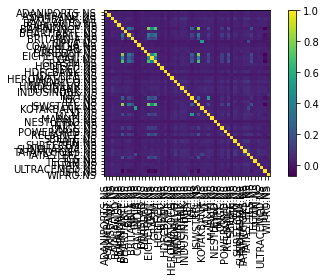

In [101]:

plotting.plot_covariance(S, plot_correlation=True);

In [102]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

ADANIPORTS.NS    0.055777
ASIANPAINT.NS    0.053791
AXISBANK.NS      0.084165
BAJAJ-AUTO.NS    0.053221
BAJAJFINSV.NS    0.060534
BAJFINANCE.NS    0.419114
BHARTIARTL.NS    0.074836
BPCL.NS          0.133552
BRITANNIA.NS     0.081991
CIPLA.NS         0.326196
COALINDIA.NS     0.035308
DIVISLAB.NS      0.054592
DRREDDY.NS       0.054412
EICHERMOT.NS     0.374696
GAIL.NS          0.153251
GRASIM.NS        0.249247
HCLTECH.NS       0.071456
HDFC.NS          0.249397
HDFCBANK.NS      0.118145
HDFCLIFE.NS      0.035112
HEROMOTOCO.NS    0.047119
HINDALCO.NS      0.077862
HINDUNILVR.NS    0.086649
ICICIBANK.NS     0.099038
INDUSINDBK.NS    0.070043
INFY.NS          0.101169
IOC.NS           0.202690
ITC.NS           0.070136
JSWSTEEL.NS      0.390506
KOTAKBANK.NS     0.160569
LT.NS            0.071413
M&M.NS           0.126556
MARUTI.NS        0.065998
NESTLEIND.NS     0.044989
NTPC.NS          0.051182
ONGC.NS          0.088217
POWERGRID.NS     0.046905
RELIANCE.NS      0.207013
SBILIFE.NS  

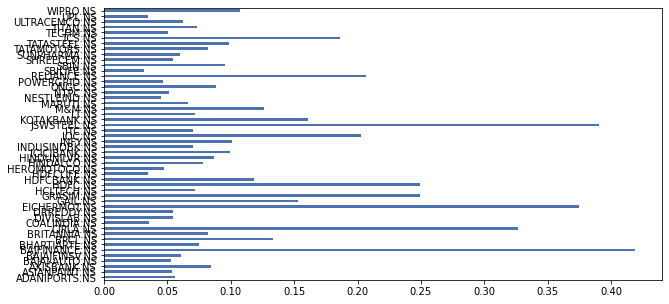

In [103]:
market_prior.plot.barh(figsize=(10,5));

Views
In the BL method, views are specified via the matrix P (picking matrix) and the vector Q. Q contains the magnitude of each view, while P maps the views to the assets they belong to.

If you are providing absolute views (i.e a return estimate for each asset), you don't have to worry about P and Q, you can just pass your views as a dictionary.

In [105]:
# You don't have to provide views on all the assets
viewdict = {
            "ICICIBANK.NS"  :   0.099038,
            "INDUSINDBK.NS" :   -0.070043,
            "INFY.NS"       :   0.101168,
            "IOC.NS"       :   -0.202709,
            "ITC.NS"       :   -0.070135,
            "JSWSTEEL.NS"   :   0.390563
}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

Black-Litterman also allows for relative views, e.g you think asset A will outperform asset B by 10%. If you'd like to incorporate these, you will have to build P and Q yourself. An explanation for this is given in the docs.




View confidences

In this section, we provide two ways that you may wish to construct the uncertainty matrix. The first is known as Idzorek's method. It allows you to specify a vector/list of percentage confidences.


In [106]:
confidences = [
    0.6,
    0.4,
    0.2,
    0.5,
    0.7, # confident in dominos
    0.7 # confident KO will do poorly

]

In [107]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

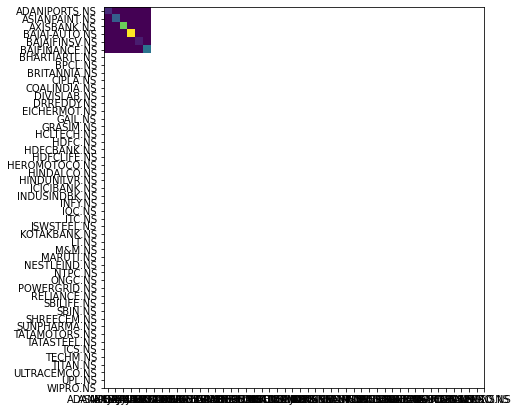

In [108]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(bl.omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [109]:
np.diag(bl.omega)


array([0.01692729, 0.04037479, 0.10548311, 0.13626307, 0.01075272,
       0.05199932])

Note how NAT, which we gave the lowest confidence, also has the highest uncertainty.

Instead of inputting confidences, we can calculate the uncertainty matrix directly by specifying 1 standard deviation confidence intervals, i.e bounds which we think will contain the true return 68% of the time. This may be easier than coming up with somewhat arbitrary percentage confidences


In [110]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0)
]

In [111]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005]



Posterior estimates

Given the inputs, we can compute a posterior estimate of returns

In [112]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [113]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

ADANIPORTS.NS    0.031689
ASIANPAINT.NS    0.030776
AXISBANK.NS      0.056465
BAJAJ-AUTO.NS    0.028737
BAJAJFINSV.NS    0.035130
BAJFINANCE.NS    0.394173
BHARTIARTL.NS    0.049943
BPCL.NS          0.101517
BRITANNIA.NS     0.057992
CIPLA.NS         0.309127
COALINDIA.NS     0.013284
DIVISLAB.NS      0.030059
DRREDDY.NS       0.029263
EICHERMOT.NS     0.347820
GAIL.NS          0.124581
GRASIM.NS        0.223227
HCLTECH.NS       0.047569
HDFC.NS          0.224648
HDFCBANK.NS      0.091064
HDFCLIFE.NS      0.014138
HEROMOTOCO.NS    0.022643
HINDALCO.NS      0.049016
HINDUNILVR.NS    0.060848
ICICIBANK.NS     0.088060
INDUSINDBK.NS   -0.016826
INFY.NS          0.091525
IOC.NS          -0.186308
ITC.NS          -0.059379
JSWSTEEL.NS      0.388109
KOTAKBANK.NS     0.133231
LT.NS            0.045326
M&M.NS          -0.004324
MARUTI.NS        0.040551
NESTLEIND.NS     0.023726
NTPC.NS          0.026510
ONGC.NS          0.058941
POWERGRID.NS     0.023013
RELIANCE.NS      0.177804
SBILIFE.NS  

In [114]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
ADANIPORTS.NS,0.055777,0.031689,NaN
ASIANPAINT.NS,0.053791,0.030776,NaN
AXISBANK.NS,0.084165,0.056465,NaN
BAJAJ-AUTO.NS,0.053221,0.028737,NaN
BAJAJFINSV.NS,0.060534,0.035130,NaN
BAJFINANCE.NS,0.419114,0.394173,NaN
BHARTIARTL.NS,0.074836,0.049943,NaN
BPCL.NS,0.133552,0.101517,NaN
BRITANNIA.NS,0.081991,0.057992,NaN
CIPLA.NS,0.326196,0.309127,NaN


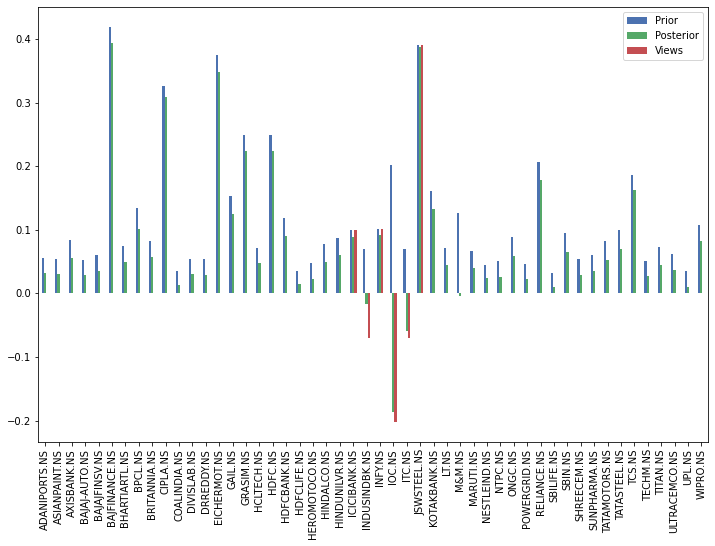

In [115]:
rets_df.plot.bar(figsize=(12,8));

Notice that the posterior is often between the prior and the views. This supports the fact that the BL method is essentially a Bayesian weighted-average of the prior and views, where the weight is determined by the confidence.

A similar but less intuitive procedure can be used to produce the posterior covariance estimate:


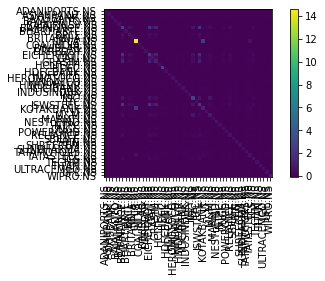

In [116]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.


In [117]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/efficient_frontier.py:248: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


OrderedDict([('ADANIPORTS.NS', 0.00234),
             ('ASIANPAINT.NS', 0.00521),
             ('AXISBANK.NS', 0.01875),
             ('BAJAJ-AUTO.NS', 0.0),
             ('BAJAJFINSV.NS', 0.00504),
             ('BAJFINANCE.NS', 0.06087),
             ('BHARTIARTL.NS', 0.01757),
             ('BPCL.NS', 0.00659),
             ('BRITANNIA.NS', 0.0),
             ('CIPLA.NS', 0.02201),
             ('COALINDIA.NS', 0.0),
             ('DIVISLAB.NS', 0.0),
             ('DRREDDY.NS', 0.0),
             ('EICHERMOT.NS', 0.03776),
             ('GAIL.NS', 0.01121),
             ('GRASIM.NS', 0.02447),
             ('HCLTECH.NS', 0.01559),
             ('HDFC.NS', 0.07758),
             ('HDFCBANK.NS', 0.05924),
             ('HDFCLIFE.NS', 0.0),
             ('HEROMOTOCO.NS', 0.0),
             ('HINDALCO.NS', 0.00935),
             ('HINDUNILVR.NS', 0.03345),
             ('ICICIBANK.NS', 0.05133),
             ('INDUSINDBK.NS', 0.0),
             ('INFY.NS', 0.06094),
             ('IOC.

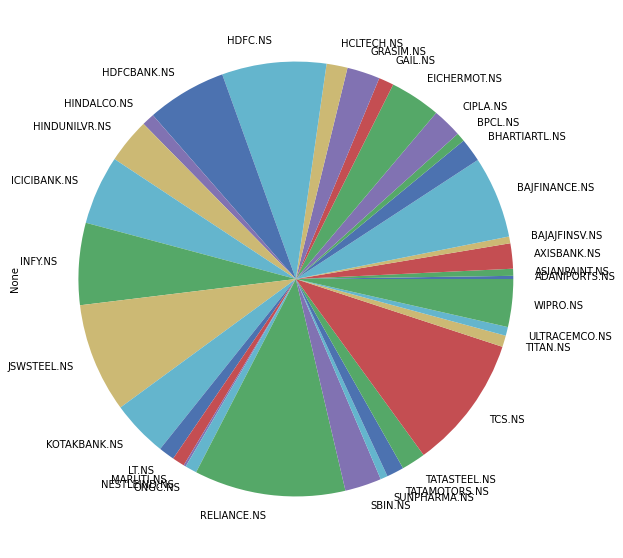

In [118]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [119]:
da = DiscreteAllocation(weights, prices.iloc[-1], total_portfolio_value=20000)
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
alloc

Leftover: $42.35


{'AXISBANK.NS': 1,
 'BHARTIARTL.NS': 1,
 'BPCL.NS': 1,
 'CIPLA.NS': 1,
 'GAIL.NS': 1,
 'HDFC.NS': 1,
 'HDFCBANK.NS': 1,
 'HINDALCO.NS': 1,
 'ICICIBANK.NS': 2,
 'INFY.NS': 1,
 'JSWSTEEL.NS': 2,
 'KOTAKBANK.NS': 1,
 'ONGC.NS': 2,
 'RELIANCE.NS': 1,
 'SBIN.NS': 2,
 'TATAMOTORS.NS': 1,
 'TCS.NS': 1,
 'WIPRO.NS': 2}

Hierarchical Risk Parity

HRP is a modern portfolio optimization method inspired by machine learning.

The idea is that by examining the hierarchical structure of the market, we can better diversify.

In this cookbook recipe, we will cover:

Downloading data for HRP

Using HRP to find the minimum variance portfolio

Plotting dendrograms


In [120]:
rets = expected_returns.returns_from_prices(prices)
rets.tail()

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-06,0.003658,-0.007244,-0.002022,0.025339,-0.007783,0.002475,-0.002143,0.021657,0.000130,-0.004895,...,-0.003879,-0.005853,0.033448,0.028734,0.005088,0.018274,0.011201,0.003934,-0.012018,0.044232
2021-05-07,0.036380,0.001020,0.001397,-0.018890,0.026342,-0.006330,0.017450,0.021083,0.002665,-0.001583,...,0.003742,0.000074,0.004979,0.073985,0.006894,0.003068,0.001454,0.011935,-0.005687,0.005758
2021-05-10,-0.002996,0.002077,-0.002093,0.000491,0.001197,0.000674,0.007124,0.023807,-0.013709,0.019651,...,-0.019039,0.027596,0.039967,0.028756,0.004022,0.009735,0.005980,-0.012157,0.071814,0.020767
2021-05-11,-0.003658,-0.000274,-0.011045,0.002753,-0.012262,-0.013242,-0.007248,0.018845,0.001347,-0.010386,...,0.007439,0.014179,0.002223,0.014428,-0.007280,-0.013579,-0.013676,0.013665,0.014453,-0.014355
2021-05-12,-0.014489,-0.000020,-0.022690,-0.001044,-0.009390,-0.012222,-0.011700,-0.028123,0.006187,0.008643,...,-0.024710,-0.007414,0.033117,-0.044372,-0.011209,-0.015045,0.013726,-0.015677,0.010667,-0.020833



HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.


In [122]:
from hierarchical_portfolio import HRPOpt

hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.02615),
             ('ASIANPAINT.NS', 0.05639),
             ('AXISBANK.NS', 0.01258),
             ('BAJAJ-AUTO.NS', 0.03441),
             ('BAJAJFINSV.NS', 0.02805),
             ('BAJFINANCE.NS', 0.00102),
             ('BHARTIARTL.NS', 0.02254),
             ('BPCL.NS', 0.00968),
             ('BRITANNIA.NS', 0.021),
             ('CIPLA.NS', 0.00027),
             ('COALINDIA.NS', 0.04367),
             ('DIVISLAB.NS', 0.03237),
             ('DRREDDY.NS', 0.01713),
             ('EICHERMOT.NS', 0.00159),
             ('GAIL.NS', 0.00619),
             ('GRASIM.NS', 0.00142),
             ('HCLTECH.NS', 0.0257),
             ('HDFC.NS', 0.00087),
             ('HDFCBANK.NS', 0.02214),
             ('HDFCLIFE.NS', 0.0288),
             ('HEROMOTOCO.NS', 0.04024),
             ('HINDALCO.NS', 0.01477),
             ('HINDUNILVR.NS', 0.0467),
             ('ICICIBANK.NS', 0.02021),
             ('INDUSINDBK.NS', 0.01077),
             ('INFY.NS', 0.